<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/58_histogram_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vaasudevan Srinivasan 🧑🏻‍💻  
StratagemGIS Solutions

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 16.2 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import pooch
import rasterio as rio
import rasterio.plot as ras_plot
from skimage import data
from skimage.exposure import match_histograms

In [ ]:
u22_file = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/raster/U22.tif',
    known_hash='e31ab10ca0a6f917c3bba2eea5d0e1a8c3ed0fde4e8b9174183019bb9f830c74'
)

In [ ]:
with rio.open(u22_file) as src:
    img_rgb = ras_plot.reshape_as_image(src.read())[3500:4500, 3000:4000, :]
    matched = match_histograms(img_rgb, data.retina(), channel_axis=-1)

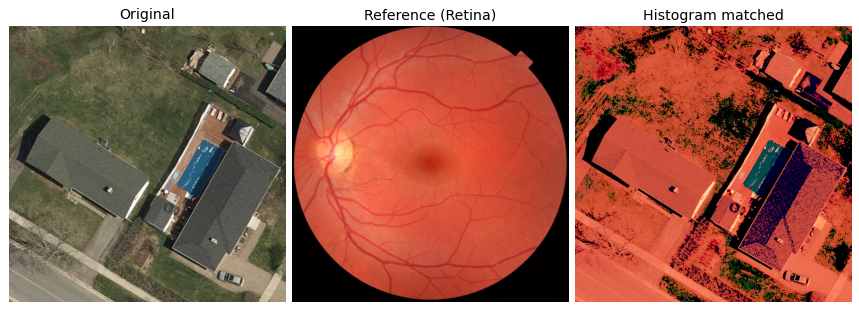

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 10), constrained_layout=True)
ax[0].imshow(img_rgb)
ax[1].imshow(data.retina())
ax[2].imshow(matched)
ax[0].set_title('Original')
ax[1].set_title('Reference (Retina)')
ax[2].set_title('Histogram matched')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.gcf().set_dpi(85);